Suppose there is a single agent with $\beta = 0.9$, $v(c) = \log(c)$, and that there are two states which are i.i.d. with equal probabilities $\pi_1 = \pi_2 = 0.5 $, and the firm's production function is 
$$
\begin{array}{l}{f(k, 1)=0.9 k^{0.3}+0.3 k} \\ {f(k, 2)=1.1 k^{0.3}+0.9 k}\end{array}
$$
Discretize the possible capital values to 50 points. Use value function iteration to compute the policy functions (one for each shock) for consumption and investment. Plot these functions. Now use 500 points for admissible capital levels and redo the exercise.

The Bellman equation to the above problem is
$$
V\left(k,z\right)=\max_{k^{\prime}}v\left(f\left(k,z\right)-k^{\prime}\right)+\beta\mathbb{E}_{z^{\prime}}V\left(k^{\prime},z^{\prime}\right)
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# parameters
beta = 0.9 # discount factor
pi = [0.5, 0.5] # state probability

# inputs for value function iterations
nk = 50 # number of grids for capital
kgrid = np.linspace(0.2, 2.0, nk)
nz = len(pi) # number of states
tol = 1e-8

# value function iteration preallocation
vguess = np.zeros((nk,nz))
vupdate = np.zeros((nk,nz))
gk = np.zeros((nk,nz))
numiters = 1
diff = 1

while diff > tol:
    
    # loop over today's capital
    for ik in range(nk):
        k = kgrid[ik]
        
        # loop over shocks
        for iz in range(nz):
            if iz == 0:
                y = 0.9*k**0.3 + 0.3*k
            else:
                y = 1.1*k**0.3 + 0.9*k
            
            vv = -1e10
            # loop over tomorrow's capital
            for ikp in range(nk):
                kp = kgrid[ikp]
                
                # a huge negative value if negative consumption
                if y - kp <= 0:
                    value = -1e10
                else:    
                    value = np.log(y - kp) + beta * (pi[0]*vguess[ikp,0] + pi[1]*vguess[ikp,1])
                    
                # pick the maximum
                if value > vv:
                    vv = value
                    kind = ikp
                
            vupdate[ik, iz] = vv
            gk[ik, iz] = kgrid[kind]
    
    diff = np.max(np.abs(vupdate-vguess))
    vguess = np.copy(vupdate)
    numiters += 1

In [3]:
print(numiters)

172


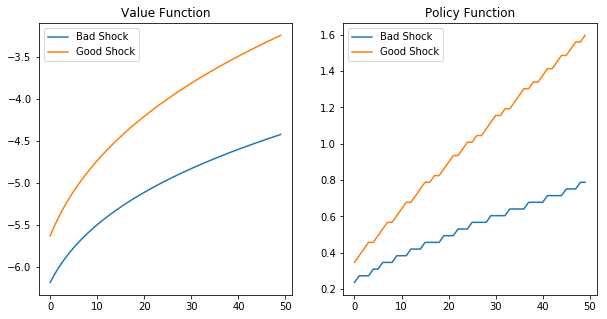

In [4]:
fig = plt.figure(figsize = [10, 5])
fig.add_subplot(1, 2, 1)
plt.plot(vupdate[:,0], label = "Bad Shock")
plt.plot(vupdate[:,1], label = "Good Shock")
plt.title("Value Function")
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(gk[:,0], label = "Bad Shock")
plt.plot(gk[:,1], label = "Good Shock")
plt.title("Policy Function")
plt.legend()
plt.show()

Now set the number of grid points of capital to 500 and re-run the above codes. 

In [5]:
# parameters
beta = 0.9 # discount factor
pi = [0.5, 0.5] # state probability

# inputs for value function iterations
nk = 500 # number of grids for capital
kgrid = np.linspace(0.2, 2.0, nk)
nz = len(pi) # number of states
tol = 1e-8

# value function iteration preallocation
vguess = np.zeros((nk,nz))
vupdate = np.zeros((nk,nz))
gk = np.zeros((nk,nz))
numiters = 1
diff = 1

while diff > tol:
    
    # loop over today's capital
    for ik in range(nk):
        k = kgrid[ik]
        
        # loop over shocks
        for iz in range(nz):
            if iz == 0:
                y = 0.9*k**0.3 + 0.3*k
            else:
                y = 1.1*k**0.3 + 0.9*k
            
            vv = -1e10
            # loop over tomorrow's capital
            for ikp in range(nk):
                kp = kgrid[ikp]
                
                # a huge negative value if negative consumption
                if y - kp <= 0:
                    value = -1e10
                else:    
                    value = np.log(y - kp) + beta * (pi[0]*vguess[ikp,0] + pi[1]*vguess[ikp,1])
                    
                # pick the maximum
                if value > vv:
                    vv = value
                    kind = ikp
                
            vupdate[ik, iz] = vv
            gk[ik, iz] = kgrid[kind]
    
    diff = np.max(np.abs(vupdate-vguess))
    vguess = np.copy(vupdate)
    numiters += 1

In [6]:
print(numiters)

172


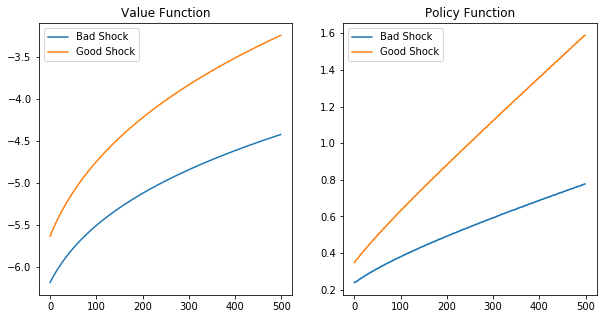

In [7]:
fig = plt.figure(figsize = [10, 5])
fig.add_subplot(1, 2, 1)
plt.plot(vupdate[:,0], label = "Bad Shock")
plt.plot(vupdate[:,1], label = "Good Shock")
plt.title("Value Function")
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(gk[:,0], label = "Bad Shock")
plt.plot(gk[:,1], label = "Good Shock")
plt.title("Policy Function")
plt.legend()
plt.show()